# Will Firmin
# Math 151AH: HW4
# Problem 1)
### Part a)
$w'_{n+1}(x)=\sum_{k=0}^n\prod_{j=0,j\not =k}^n(x-x_j)$ by the product rule

$\Rightarrow w'_{n+1}(x_i)=\prod_{j=0,j\not=i}^n$ since each term is 0 if $i\not=k$

Therefore $w_i=\frac1{w'_{n+1}(x_i)}$

### Part b)
RHS is a polynomial of degree $n+1$ with $n+1$ unique roots.  $T_n$ has a leading coefficient of $2^{n-1}$, which gives that $T'_n$ has a leading coefficient of $2^{n-1}n$ by the power rule.  Therefore $T'_n(x)(x+1)(x-1)$ has a leading coefficient of $2^{n-1}n$, so in total RHS is a monic polynomial.  Both RHS and LHS are monic polynomials of degree $n+1$ with the same $n+1$ roots, so we must have that $w_{n+1}(x)=\frac{T'_n(x)(x+1)(x-1)}{2^{n-1}n}$.

### Part c)
$$\begin{aligned}
T_n(x)&=\cos(n\arccos(x)) \\
\Rightarrow T'_n(x)&=n\sin(n\arccos(x))(1-x^2)^{-\frac12} \\
\Rightarrow T{''}(x)&=-n^2\cos(n\arccos(x))(1-x^2)^{-1}+\frac12n\sin(n\arccos(x))(1-x^2)^{-\frac32}(2x)\\
\Rightarrow L.H.S.&=-n^2\cos(n\arccos(x))+xn\sin(n\arccos(x))(1-x^2)^{-\frac12} -xn\sin(n\arccos(x))(1-x^2)^{-\frac12}+n^2\cos(n\arccos(x))\\
&=0
\end{aligned}$$

### Part d)
$$\begin{aligned}
w'_{n+1}(x)&=\frac{T{''}_n(x)(x^2-1)+T_n'(x)(x-1)+T_n'(x)(x+1)}{2^{n-1}n} \\
&=\frac1{2^{n-1}n}((x^2-1)T{''}_n(x)+2xT'_n(x)) \\
&=-(2^{n-1}n)^{-1}[(1-x^2)T{''}_n(x)-2xT'_n(x)] \\
\Rightarrow w_i&=(2^{n-1}n)[n^2T_n(x_i)+x_iT'_n(x_i)]^{-1}\\
&=2^{n-1}n(n^2(-1)^i+x_iT'_n(x_i))^{-1} \\
\text{For }i\in\{1,...,n-1\}: \\
&=\frac{2^{n-1}}n(-1)^i\;\text{ since }T'(x_i)=0
\end{aligned}$$

Using L'Hopital's Rule, $\lim_{x\rightarrow1}T_n'(x)=n^2$ and $\lim_{x\rightarrow-1}T_n'(x)=n^2(-1)^{n+1}$.  This gives that
$$\begin{aligned}
w_0&=2^{n-1}n[n^2(-1)^0+x_0T'_n(x_0)]^{-1} \\
&=2^{n-1}n[n^2+n^2]^{-1} \\
&=\frac{2^{n-1}}{n}\frac12\\
w_1 &= 2^{n-1}n[n^2(-1)^n+n^2(-1)^n]^{-1}\\
&=\frac{2^{n-1}}n\frac12(-1)^n
\end{aligned}$$

# Problem 2)

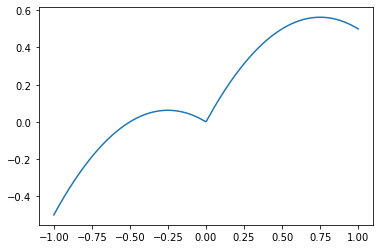

In [35]:
import numpy as np
import math
import datetime

f = lambda x: np.abs(x) + 0.5*x - x**2
n1 = 50
n3 = 500
nodes1 = [math.cos(i*math.pi / (n1-1)) for i in range(n1)]
nodes3 = [math.cos(i*math.pi / (n3-1)) for i in range(n3)]
n2 = 5000
nodes2 = [-1 + 2*i/(n2-1) for i in range(n2)]
diffs = {}


def dDiff(f,x):
    try:
        if len(x)==1: return f(x[0])
    except:
        return f(x)
    else:
        lab = ",".join([str(k) for k in x])
        try: return diffs[lab]
        except:
            dif = (dDiff(f,x[1:]) - dDiff(f,x[:-1]))/(x[-1]-x[0])
            diffs[lab] = dif
            return dif
    
def w(k,x):
    if k == 0: return 1
    else: return np.prod(np.array([x-nodes1[j] for j in range(k)]))

def P1(x):
    return sum([dDiff(f,nodes1[0:k+1])*w(k,x) for k in range(len(nodes1))])

# Barycentric:
wi = [(np.prod(np.array([nodes3[i]-nodes3[j] for j in range(n3) if not i == j])))**-1 for i in range(n3)]
#def wi(i):
#    return (np.prod(np.array([nodes1[i]-nodes1[j] for j in range(len(nodes1)) if not i == j])))**-1

def P2(x):
    if x in nodes3: return f(x)
    return sum([wi[i]/(x-nodes3[i])*f(nodes3[i]) for i in range(n3)]) / sum([wi[i]/(x-nodes3[i]) for i in range(n3)])

import matplotlib.pyplot as plt
#plt.plot(nodes2, [f(x) for x in nodes2], label="f(x)")
#plt.plot(nodes2, [P1(x) for x in nodes2], label="Divided Differences")
plt.plot(nodes2, [P2(x) for x in nodes2])
plt.show()

# Problem 3)


# Problem 5)

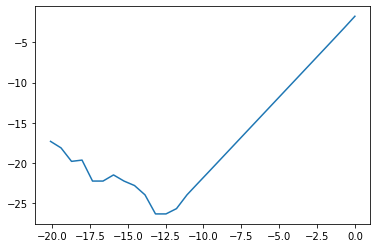

In [49]:
f = lambda x: math.e**x
centerDiff = lambda f,x,h: (f(x+h)-f(x-h))/(2*h)
h=1
E = {}
while h**-1 <= 10**9:
    E[h] = np.abs(centerDiff(f,1,h)-math.e)/math.e
    h /= 2

plt.plot(np.log(list(E.keys())), np.log(list(E.values())))
plt.show()

In [44]:
E = {}
E[1] = 0
E[4] = 2
list(E.values())

[0, 2]